In [1]:
import pandas as pd
df = pd.read_hdf('/kaggle/input/final-sepsis-dataset/Sepsis-Early-Prediction.h5', key='my_data')


# Removing data that is unlcear or dosent have a clear representation if sepsis occured.
df = df[df['early_sepsis_target'] != -1]

# Feature Selection

In [3]:
# Removing columns that are not requred from the dataset

unnecessary_columns = [
    # These columns were used to extract the data from the main dataaset.
    'subject_id',
    'hadm_id',
    'stay_id',
    # Cloumns that are time based used to calcualte the target variable
    'admittime',
    'intime',
    'charttime',
    'hours_since_admission',
    'hour_of_day',
    'primary_diagnosis_code',
    "is_night_shift",
    # Feature Engneered Columns that have to contirbuition to predicting sepsis.
    'sepsis',
    'blood_transfusion',
    'lab_wbc',
    'sofa_renal',
    'sofa_liver',
    'lab_pt',
    'lab_inr',
    'dialysis',
    'lab_wbc.1',
    'sofa_cns',
    'lab_bun',
    'lab_crp',
    'lab_lactate',
    'vital_resp_rate_rolling_mean',
    'vital_resp_rate_rolling_std',
    'vital_map_rolling_std',
    'vital_map_rolling_mean',
    'vital_heart_rate_rolling_std',
    'vital_map_rolling_mean',
    'vital_heart_rate_rolling_mean',
    'sofa_respiratory',
    'lab_platelet',
    'lab_creatinine',
    'vital_spo2_rolling_std',
    'vital_spo2_rolling_mean',
    'sofa_coagulation',
    'has_infection',
    'spo2_fio2_ratio',
    'suspected_infection',
    'central_line',
    'sofa_cardiovascular',
]

df = df.drop(unnecessary_columns, axis=1)

In [4]:
# Viewing all the columns that will be used to predict sepsis
df.columns.tolist()

['anchor_age',
 'admission_location',
 'has_diabetes',
 'has_hypertension',
 'has_ckd',
 'has_chf',
 'has_copd',
 'has_cancer',
 'has_liver_disease',
 'mechanical_ventilation',
 'vital_heart_rate',
 'vital_sbp',
 'vital_dbp',
 'vital_map',
 'vital_resp_rate',
 'vital_spo2',
 'vital_gcs',
 'vital_temperature',
 'lab_paco2',
 'lab_bilirubin',
 'sofa_total',
 'sofa_change',
 'organ_dysfunction',
 'early_sepsis_target']

In [5]:
df.describe()

,anchor_age,vital_heart_rate,vital_sbp,vital_dbp,vital_map,vital_resp_rate,vital_spo2,vital_gcs,vital_temperature,lab_paco2,lab_bilirubin,sofa_total,sofa_change,early_sepsis_target
count,6.633853e+06,5.642074e+06,1.840692e+06,1.840374e+06,1.847623e+06,5.579766e+06,5.519115e+06,1.449791e+06,1.329141e+06,9127.000000,6447.000000,6.633853e+06,6.633853e+06,6.633853e+06
mean,6.338305e+01,8.770755e+01,1.202875e+02,6.087312e+01,8.047720e+01,2.036952e+01,1.006334e+02,3.330953e+00,9.872203e+01,42.999069,3.298519,1.013143e+00,3.169048e-01,6.149970e-03
std,1.639298e+01,4.212162e+03,9.788983e+01,2.753211e+02,1.809514e+02,1.005111e+03,5.183041e+03,1.026816e+00,2.034463e+02,12.082283,6.274264,1.709874e+00,2.237730e+00,7.818024e-02
min,1.800000e+01,-2.413950e+05,-9.400000e+01,-3.900000e+01,-1.350000e+02,0.000000e+00,0.000000e+00,1.000000e+00,-9.990000e+01,11.000000,0.000000,0.000000e+00,-1.300000e+01,0.000000e+00
25%,5.300000e+01,7.300000e+01,1.030000e+02,5.100000e+01,6.900000e+01,1.600000e+01,9.500000e+01,3.000000e+00,9.790000e+01,36.000000,0.500000,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.500000e+01,8.400000e+01,1.180000e+02,5.800000e+01,7.700000e+01,1.900000e+01,9.700000e+01,4.000000e+00,9.840000e+01,41.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.600000e+01,9.700000e+01,1.350000e+02,6.700000e+01,8.900000e+01,2.300000e+01,9.900000e+01,4.000000e+00,9.900000e+01,48.000000,2.800000,2.000000e+00,0.000000e+00,0.000000e+00
max,9.100000e+01,1.000000e+07,9.511900e+04,1.141000e+05,1.171130e+05,2.355560e+06,9.765430e+06,4.000000e+00,2.341230e+05,180.000000,74.700000,1.600000e+01,1.600000e+01,1.000000e+00


# Encoding

In [6]:
# Numeric & Cateorical Values

categorical_columns = []
numeric_columns = []

for column in df:
    if df[column].dtype == 'object' or df[column].dtype == 'category':
        categorical_columns.append(column)
    else:
        numeric_columns.append(column)

print(f"Categorical Columns : {categorical_columns}")
print(f"Numeric Columns : {numeric_columns}")

Categorical Columns : ['admission_location']
Numeric Columns : ['anchor_age', 'has_diabetes', 'has_hypertension', 'has_ckd', 'has_chf', 'has_copd', 'has_cancer', 'has_liver_disease', 'mechanical_ventilation', 'vital_heart_rate', 'vital_sbp', 'vital_dbp', 'vital_map', 'vital_resp_rate', 'vital_spo2', 'vital_gcs', 'vital_temperature', 'lab_paco2', 'lab_bilirubin', 'sofa_total', 'sofa_change', 'organ_dysfunction', 'early_sepsis_target']


# Encoding - Categorical Features

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


# Initialize LabelEncoder
label_encoder = LabelEncoder()

label_encoder = LabelEncoder()

for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])    

# Encoding & Imputation - Numeric Features

In [8]:
# NaN Values

print("NaN Values:")

columns_to_impute = []

for column in df:
    NaN_counts = df[f"{column}"].isna().sum()
    if NaN_counts != 0:
        columns_to_impute.append(column)
        print(column, ":", NaN_counts)
    else:
        pass

NaN Values:
vital_heart_rate : 991779
vital_sbp : 4793161
vital_dbp : 4793479
vital_map : 4786230
vital_resp_rate : 1054087
vital_spo2 : 1114738
vital_gcs : 5184062
vital_temperature : 5304712
lab_paco2 : 6624726
lab_bilirubin : 6627406


In [9]:
from sklearn.impute import IterativeImputer

columns_to_encode = []

numeric_imputer = IterativeImputer(missing_values=np.nan, max_iter=30)
df[columns_to_impute] = numeric_imputer.fit_transform(df[columns_to_impute])  

# Data Pre-Processing

In [15]:
df['early_sepsis_target'].value_counts()

early_sepsis_target
0    6593055
1      40798
Name: count, dtype: int64

In [10]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split


X = df.drop(columns=["early_sepsis_target"]) 
y = df["early_sepsis_target"] 

# To simulate real word scenario's random sampler is used. This also fixes the class squed class distrbution.
undersampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Train & Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


# Modeling

## Ensemble - Random Forest, Naive Bayes and K-Nearest Neighbours


Cross-validation ROC-AUC scores:
Random Forest: Mean ROC-AUC = 0.9065, Std = 0.0016
Naive Bayes: Mean ROC-AUC = 0.8429, Std = 0.0025
KNN: Mean ROC-AUC = 0.8838, Std = 0.0026
Ensemble: Mean ROC-AUC = 0.8968, Std = 0.0010

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82      8160
           1       0.84      0.77      0.80      8160

    accuracy                           0.81     16320
   macro avg       0.81      0.81      0.81     16320
weighted avg       0.81      0.81      0.81     16320


Confusion Matrix:
[[6925 1235]
 [1859 6301]]


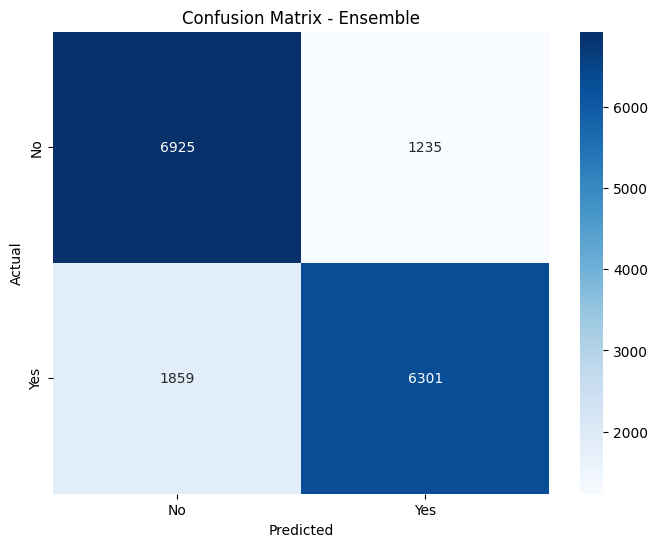


Test ROC-AUC Score (Ensemble): 0.8951


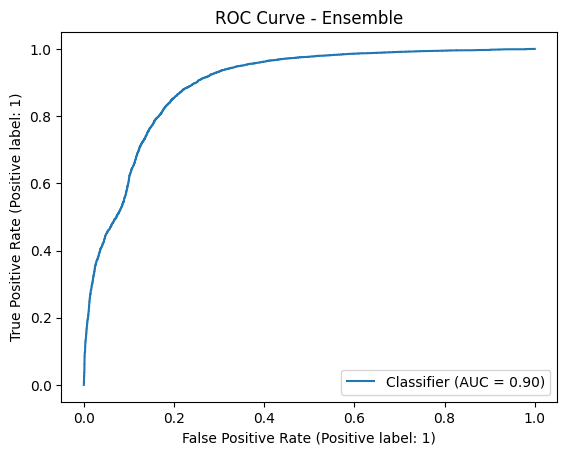

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Define models
rf = RandomForestClassifier(random_state=42)
nb = GaussianNB()
knn = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

# Voting ensemble
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('nb', nb), ('knn', knn)],
    voting='soft'
)

# Evaluate using 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

models = {
    'Random Forest': rf,
    'Naive Bayes': nb,
    'KNN': knn,
    'Ensemble': ensemble
}

print("\nCross-validation ROC-AUC scores:")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')
    print(f"{name}: Mean ROC-AUC = {scores.mean():.4f}, Std = {scores.std():.4f}")

# Fit ensemble on full training data
ensemble.fit(X_train, y_train)

# Predict and evaluate on test set
y_pred = ensemble.predict(X_test)
y_proba = ensemble.predict_proba(X_test)[:, 1]

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Ensemble")
plt.show()

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nTest ROC-AUC Score (Ensemble): {roc_auc:.4f}")

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - Ensemble")
plt.show()


## XGboost

Starting Bayesian optimization...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for ea

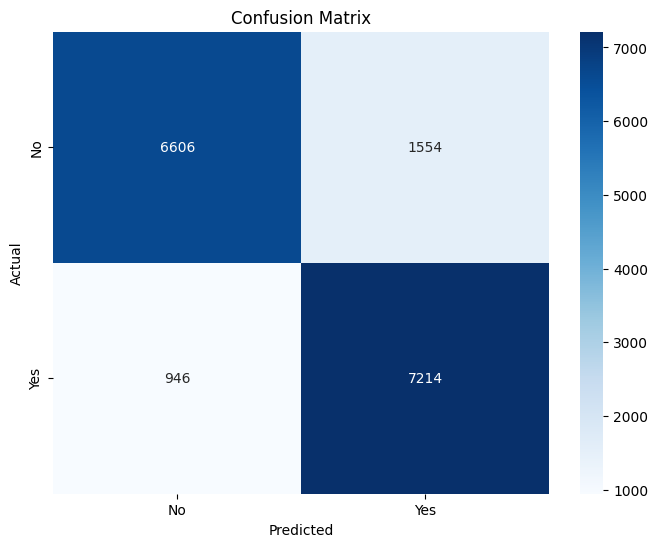


Test ROC-AUC Score: 0.9188


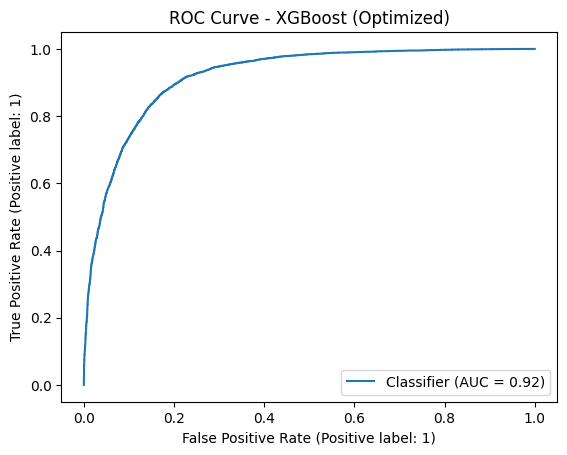

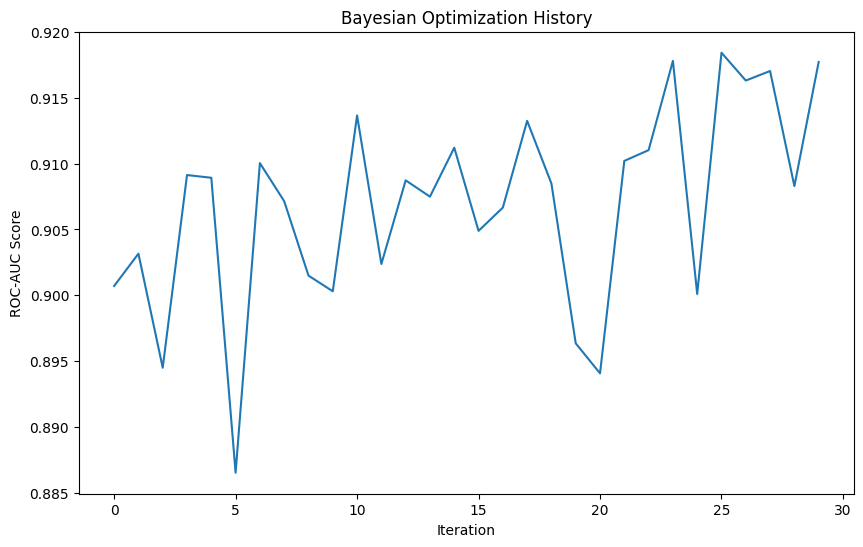


Top 10 Most Important Features:
                   Feature  Importance
8        has_liver_disease    0.226070
3         has_hypertension    0.169523
9   mechanical_ventilation    0.127992
22       organ_dysfunction    0.127533
5                  has_chf    0.065997
7               has_cancer    0.065046
2             has_diabetes    0.041733
6                 has_copd    0.027005
4                  has_ckd    0.026964
21             sofa_change    0.018729


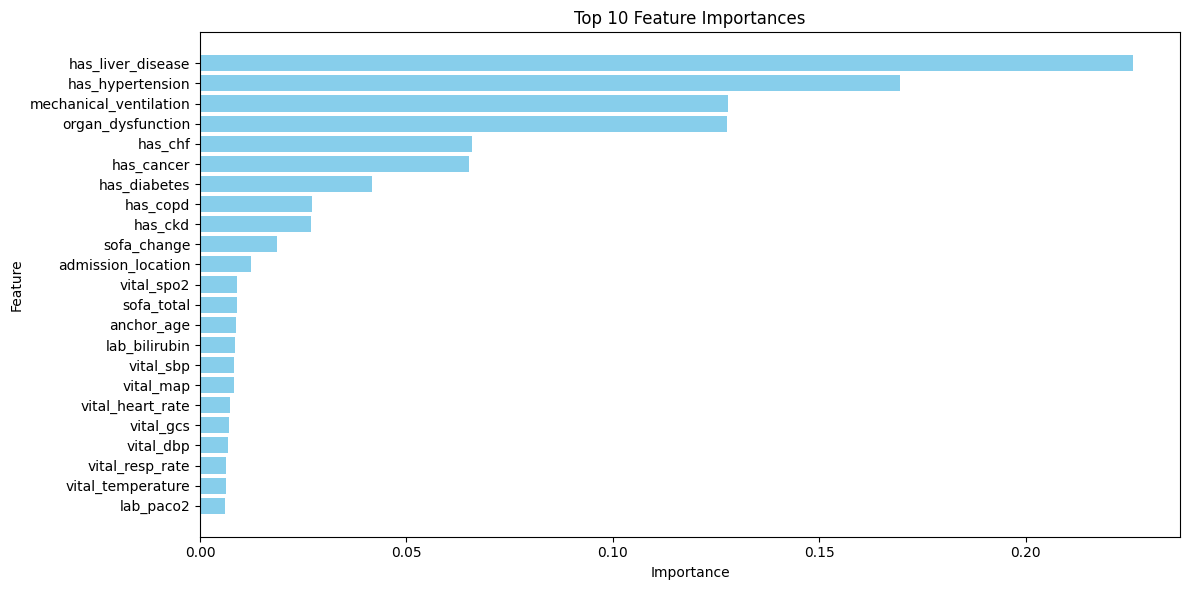

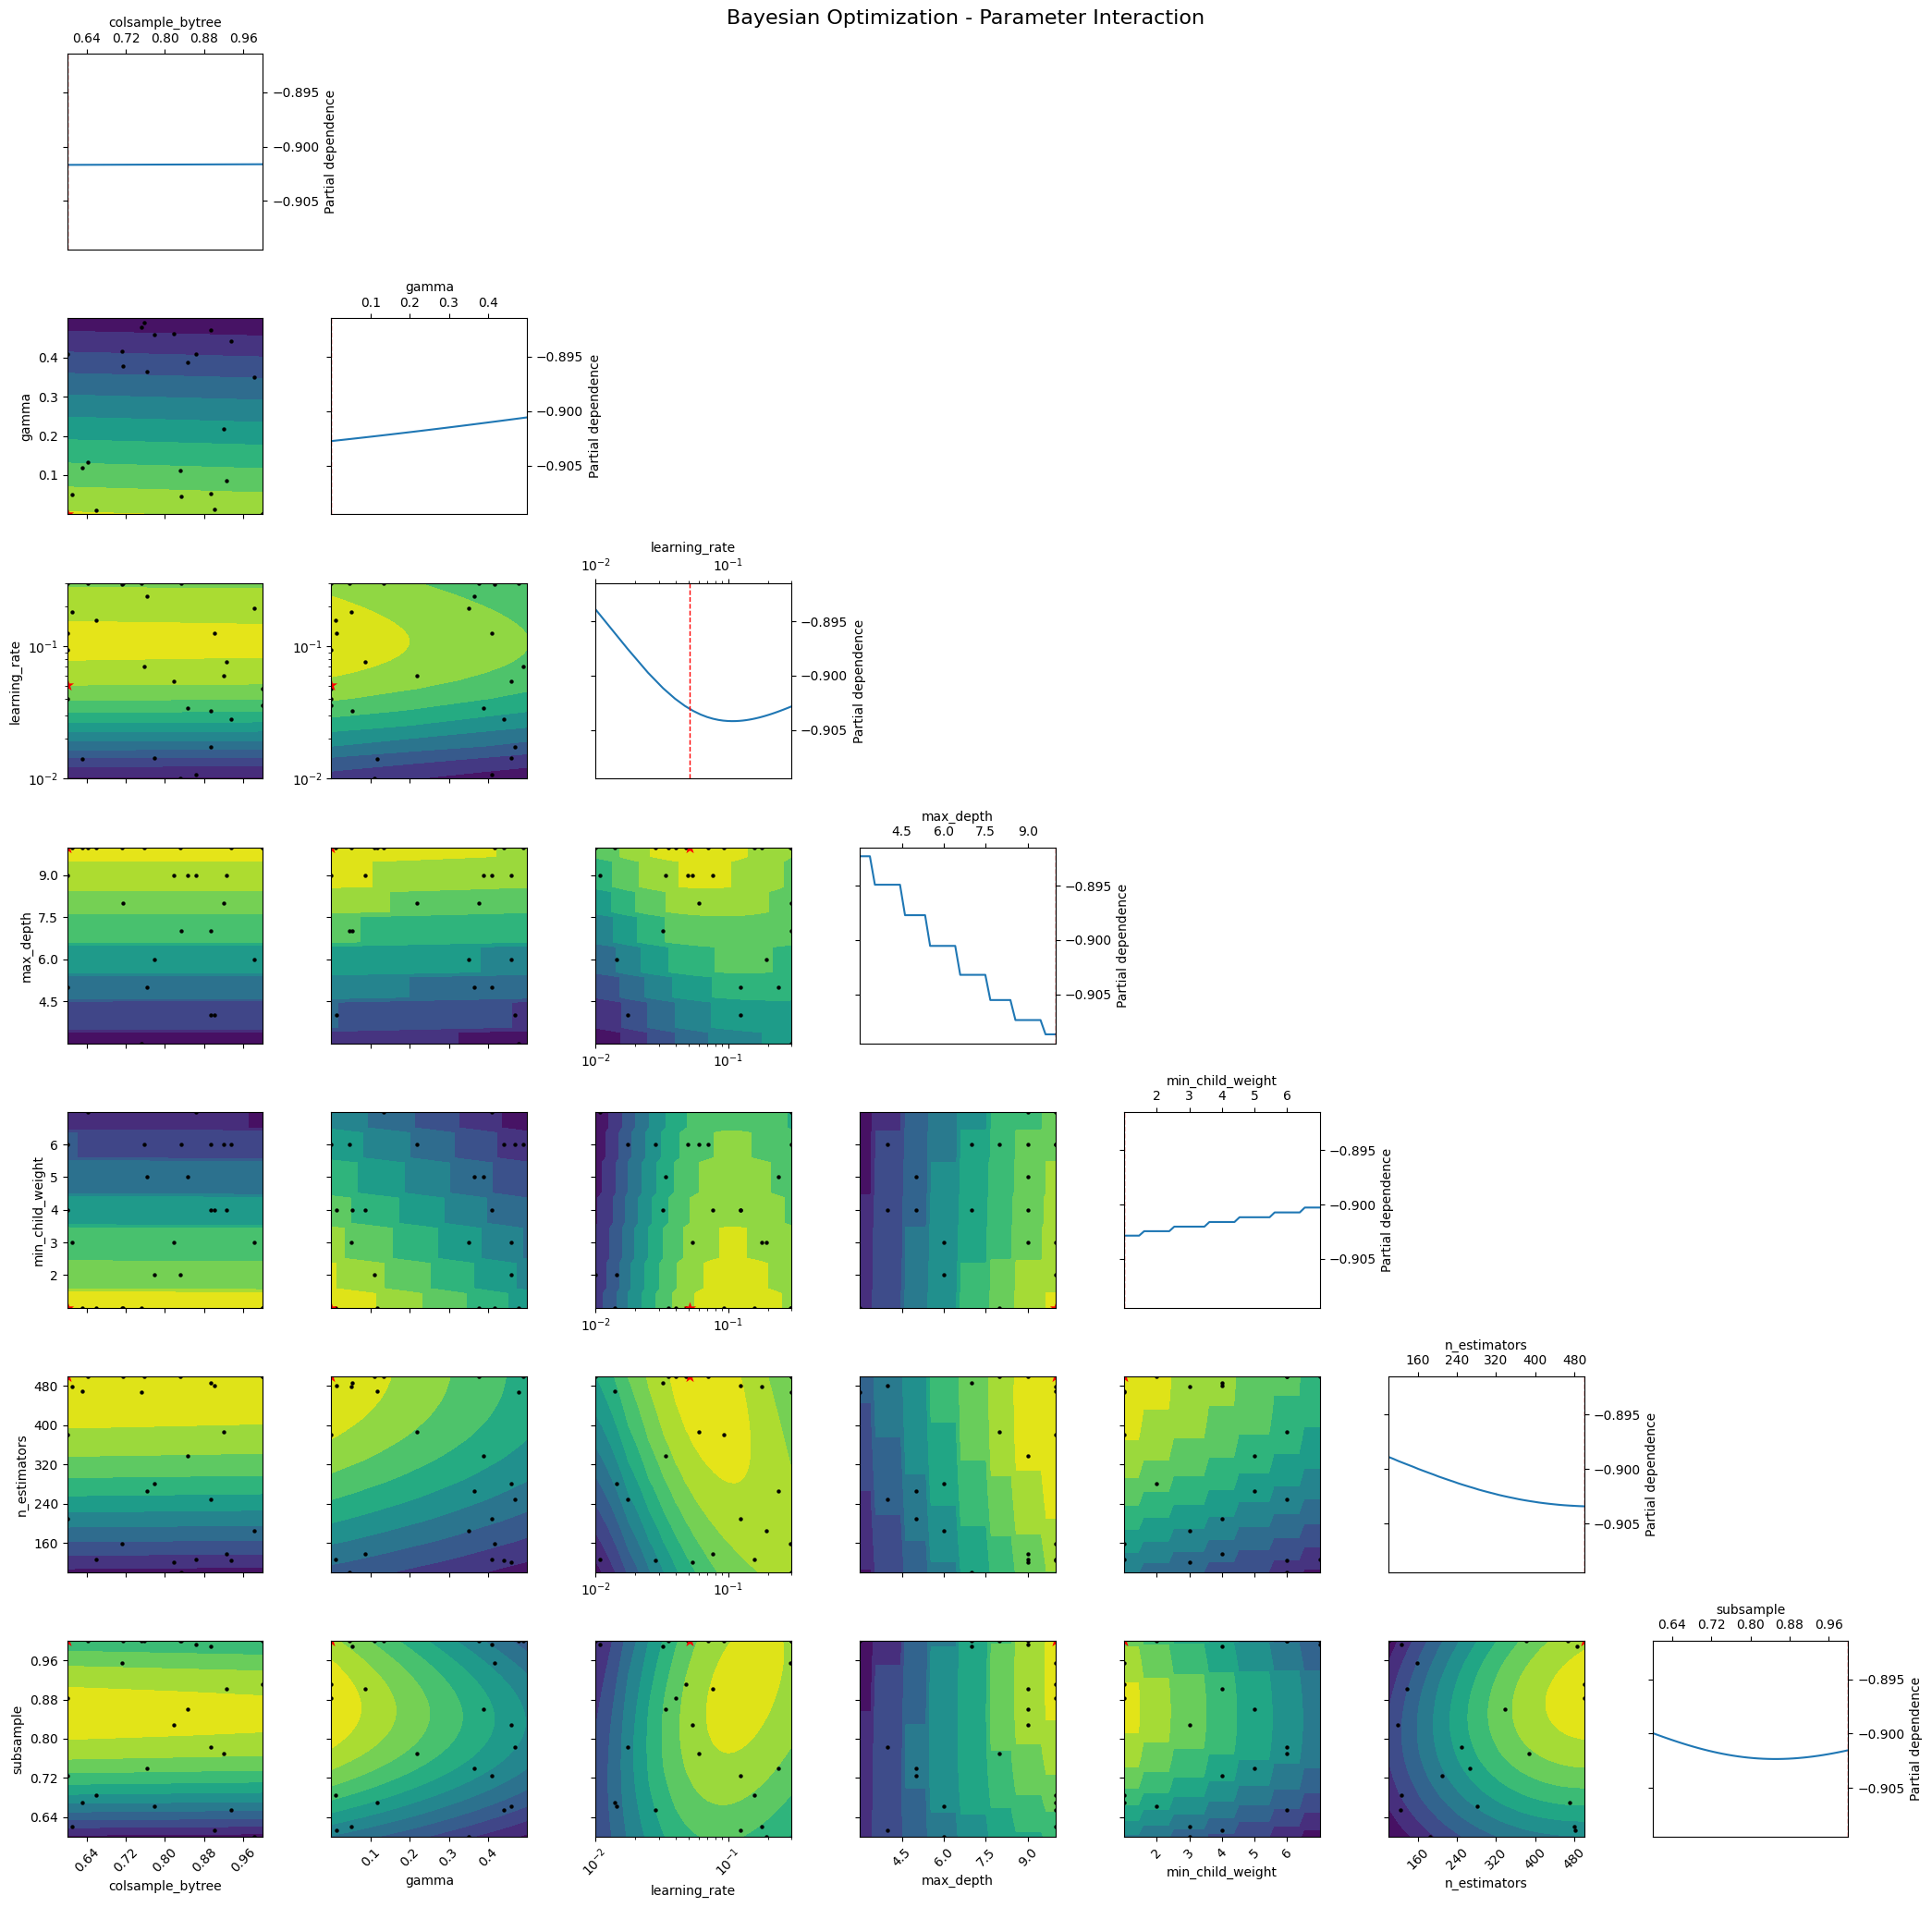


Hyperparameter Optimization Summary:
--------------------------------------------------
Number of iterations: 30
Best ROC-AUC score: 0.9184

Best parameters:
colsample_bytree: 0.6
gamma: 0.0
learning_rate: 0.0509324893141456
max_depth: 10
min_child_weight: 1
n_estimators: 500
subsample: 1.0

Baseline ROC-AUC score: 0.9059
Improvement over baseline: 1.38%


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from xgboost import XGBClassifier
from fastai.tabular.all import *
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
from skopt import BayesSearchCV
from skopt.space import Real, Integer
from skopt.plots import plot_objective
import joblib
import warnings
warnings.filterwarnings('ignore')

# Define the parameter space for Bayesian optimization
param_space = {
    'n_estimators': Integer(100, 500),
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.6, 1.0),
    'colsample_bytree': Real(0.6, 1.0),
    'min_child_weight': Integer(1, 7),
    'gamma': Real(0, 0.5)
}

# Create base XGBoost model
base_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Initialize BayesSearchCV
n_iter = 30
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

bayes_search = BayesSearchCV(
    estimator=base_model,
    search_spaces=param_space,
    n_jobs=-1,
    cv=cv,
    n_iter=n_iter,
    scoring='roc_auc',
    random_state=42,
    verbose=1
)

# Perform Bayesian optimization
print("Starting Bayesian optimization...")
bayes_search.fit(X_train, y_train)

# Print best parameters and score
print("\nBest parameters found:")
print(bayes_search.best_params_)
print(f"\nBest cross-validation score: {bayes_search.best_score_:.4f}")

# Create model with best parameters
best_model = XGBClassifier(
    **bayes_search.best_params_,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Train final model on full training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC Score on test set
roc_auc = roc_auc_score(y_test, y_proba)
print(f"\nTest ROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_proba)
plt.title("ROC Curve - XGBoost (Optimized)")
plt.show()

# Plot optimization history
plt.figure(figsize=(10, 6))
plt.plot(bayes_search.cv_results_['mean_test_score'])
plt.xlabel('Iteration')
plt.ylabel('ROC-AUC Score')
plt.title('Bayesian Optimization History')
plt.show()

# Feature Importance Analysis
importances = best_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
})
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

# Display Top 10 Features
print("\nTop 10 Most Important Features:")
print(feature_importance_df.head(10))

# Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(feature_importance_df["Feature"], feature_importance_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

# Plot parameter interaction (Objective Plot)
plot_objective(bayes_search.optimizer_results_[0], size=3)
plt.suptitle("Bayesian Optimization - Parameter Interaction", fontsize=16)
plt.tight_layout()
plt.show()

# Save best model
joblib.dump(best_model, 'best_xgboost_model.pkl')

# Print hyperparameter optimization summary
print("\nHyperparameter Optimization Summary:")
print("-" * 50)
print(f"Number of iterations: {n_iter}")
print(f"Best ROC-AUC score: {bayes_search.best_score_:.4f}")
print("\nBest parameters:")
for param, value in bayes_search.best_params_.items():
    print(f"{param}: {value}")

# Calculate and print improvement over baseline
baseline_model = XGBClassifier(random_state=42)
baseline_scores = cross_val_score(baseline_model, X_train, y_train, cv=5, scoring='roc_auc')
baseline_mean = np.mean(baseline_scores)
improvement = ((bayes_search.best_score_ - baseline_mean) / baseline_mean) * 100

print(f"\nBaseline ROC-AUC score: {baseline_mean:.4f}")
print(f"Improvement over baseline: {improvement:.2f}%")
